# Project 5 - Linear Regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [42]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


In [44]:
missings = diamonds.loc[(diamonds['x']==0)|
                       (diamonds['y']==0)|
                       (diamonds['z']==0),:]
missings

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [121]:
diamonds = diamonds.drop(index = missings.index)

KeyError: '[ 2010  2104  4323  4941  9187 10119 10825 12290 14433 22126 22240 23691\n 23795 24573 24864 24934 25143 44936] not found in axis'

In [122]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


Categorical variables:

Cut 	Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

Color 	Diamond colour, from J (worst) to D (best)

Clarity 	A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Transforming all the categorical variables(cut, color and clarity) to dummies.

In [123]:
categories_dummies = pd.get_dummies(diamonds[['cut','color','clarity']])

In [124]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [125]:
first_model = pd.concat([diamonds[['carat', 'depth', 'table', 'x', 'y','z']],
                       categories_dummies], axis = 1)

In [126]:
first_model.head(5)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.24,62.8,57.0,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


Creating baseline model.

In [142]:
model = LinearRegression()
X = first_model
y = diamonds['price']
model.fit(X,y)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [143]:
rmse

1122.340533850967

In [144]:
model.score(X,y)

0.9207516507081606

In [145]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')

In [147]:
rick_dummies = pd.get_dummies(rick_diamonds[['cut','color','clarity']])

In [152]:
rick_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   x        5000 non-null   float64
 7   y        5000 non-null   float64
 8   z        5000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 351.7+ KB


In [148]:
rick = pd.concat([rick_diamonds[['carat', 'depth', 'table', 'x', 'y','z']],
                  rick_dummies], axis = 1)


In [158]:
rick = rick.drop(columns = 'price_predicted')

In [156]:
first_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [157]:
rick.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price_predicted'],
      dtype='object')

In [159]:
first_model.shape,rick.shape

((48922, 26), (5000, 26))

In [160]:
model = LinearRegression()
X = first_model
y = diamonds['price']
model.fit(X,y)
rick_diamonds['price_predicted'] = model.predict(rick)

In [161]:
rick_diamonds.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3017.693766
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,778.213521
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1382.198203
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7233.659492
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16884.596014


Saving the prediction made with the first model.

In [162]:
rick_diamonds.to_csv('first_model.csv')

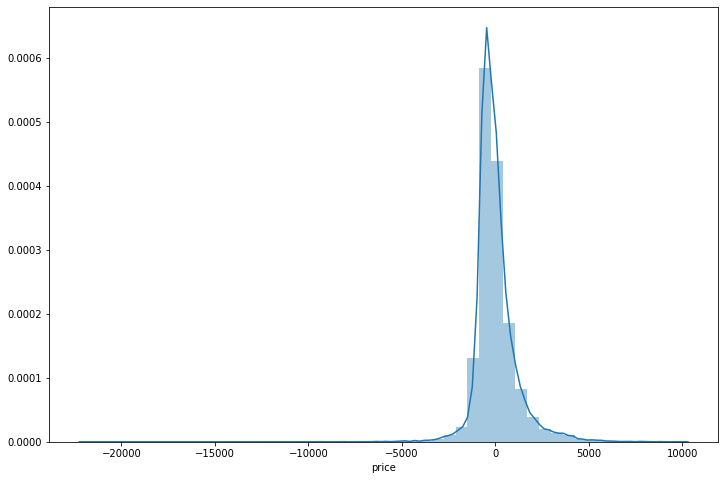

In [131]:
plt.figure(figsize = (12,8))
sns.distplot(y-y_pred)

Standardizing the scale of numerical independent variables.

In [56]:
scaler = StandardScaler()
scaled_fm = scaler.fit_transform(first_model)

In [118]:
model = LinearRegression()
X = scaled_fm
y = diamonds['price']
model.fit(X,y)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [119]:
rmse

1921.868473461441

In [120]:
model.score(X,y)

0.767625614578312

Standardizing the variables have zero impact in the model.

In [60]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [62]:
for column in ['carat','depth','table','x','y','z']:
    print(stats.shapiro(first_model[column]))

(0.8938191533088684, 0.0)
(0.9538832306861877, 0.0)
(0.9539326429367065, 0.0)
(0.9557861685752869, 0.0)
(0.9141300916671753, 0.0)
(0.9303917288780212, 0.0)


C:\Users\55119\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
stats.boxcox(diamonds['carat'])

(array([-1.68430374, -1.57900773, -1.31484883, ..., -0.33376678,
        -0.36288462, -0.29171277]), -0.09650648181132684)

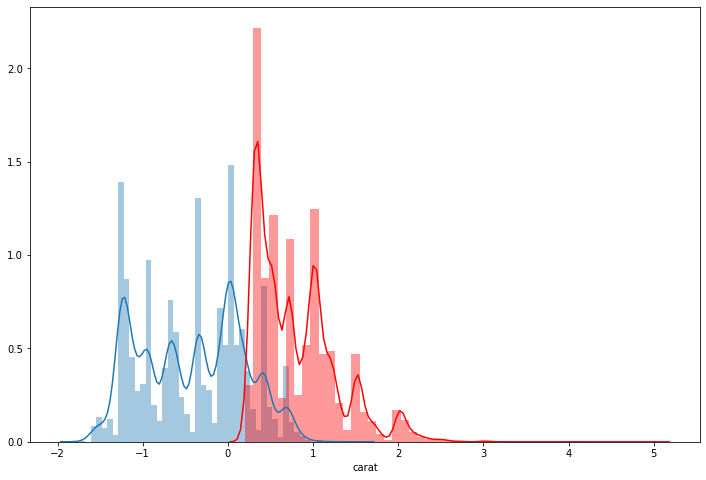

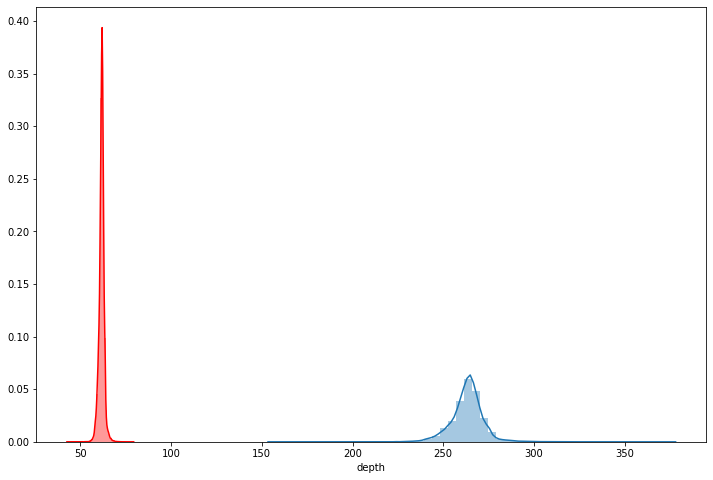

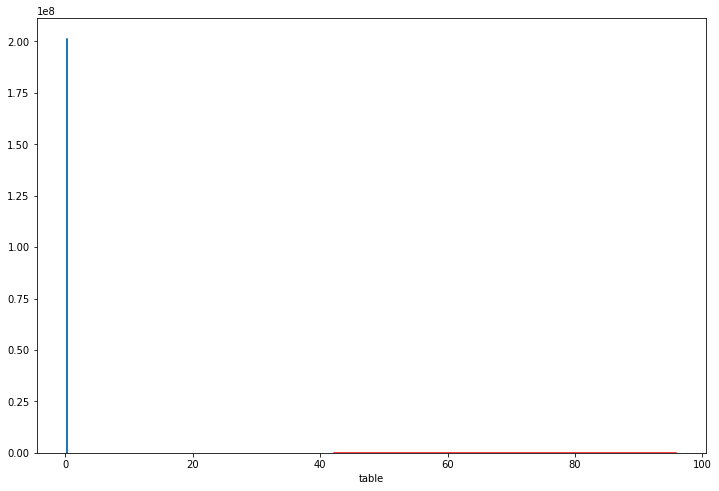

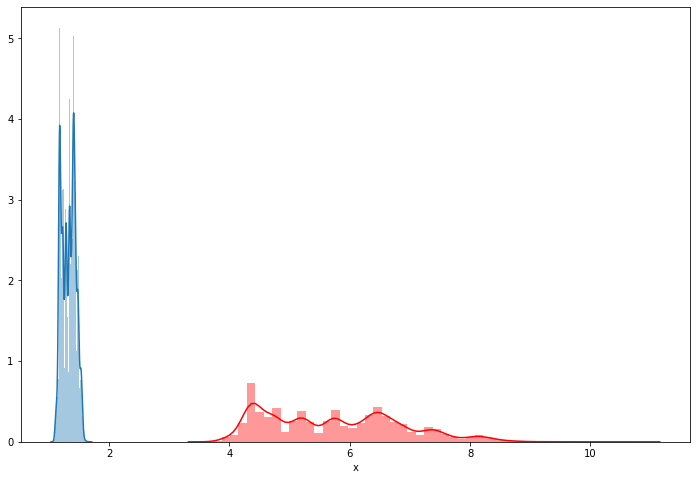

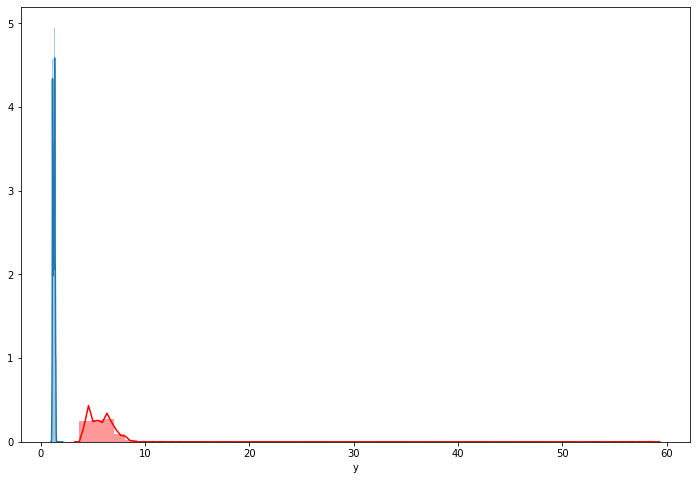

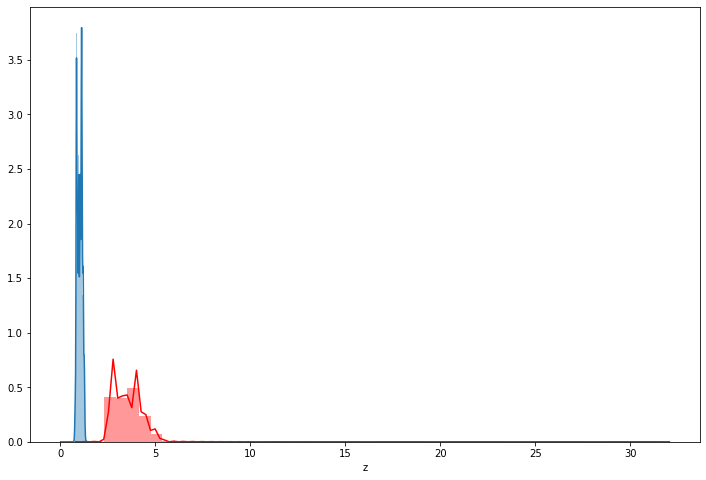

In [77]:
for column in ['carat','depth','table','x','y','z']:
    plt.figure(figsize = (12,8))
    sns.distplot(stats.boxcox(first_model[column])[0])
    sns.distplot(first_model[column], color = 'red');

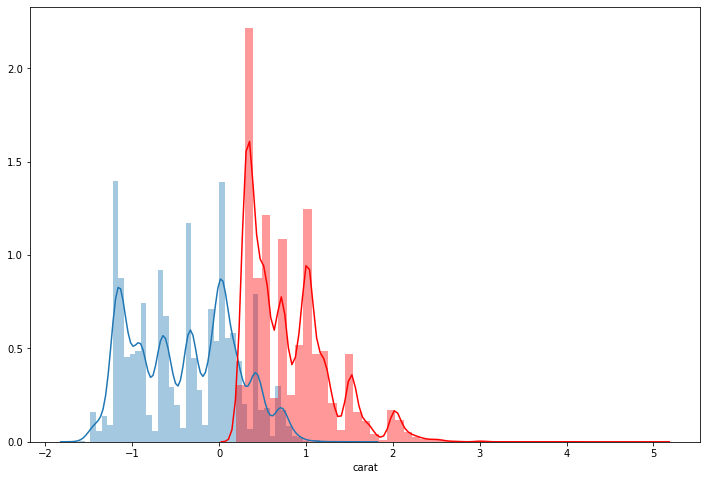

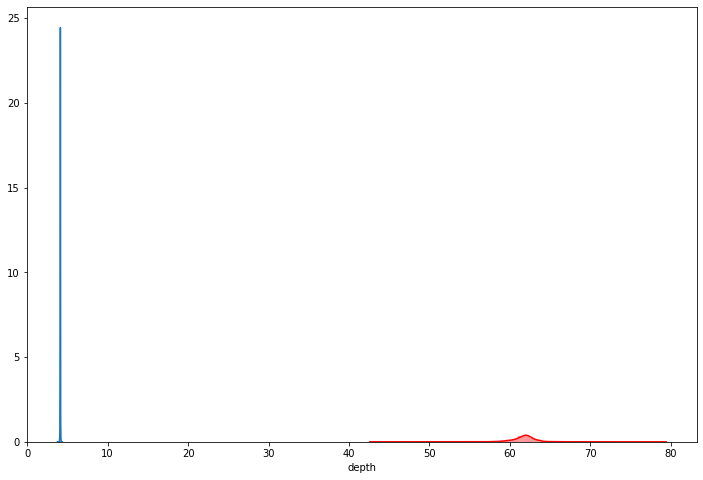

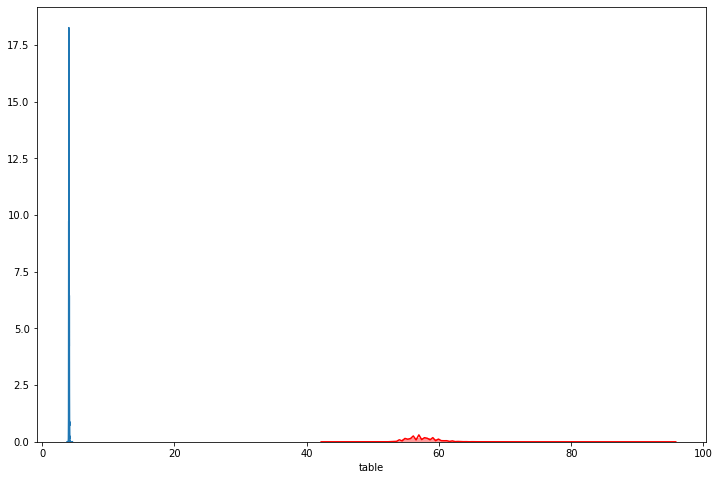

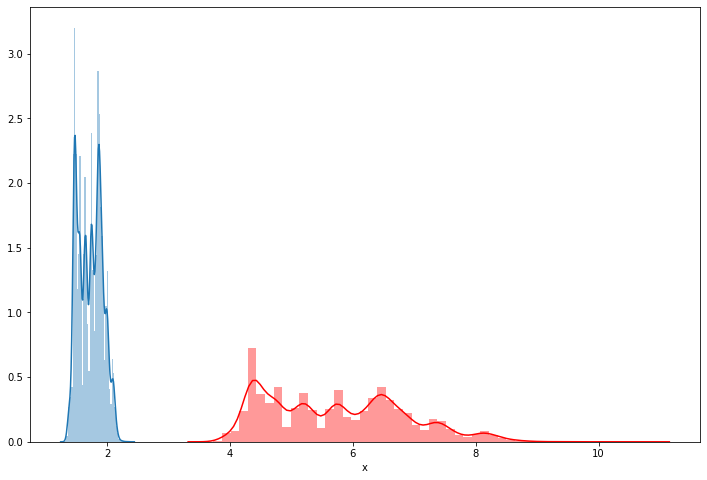

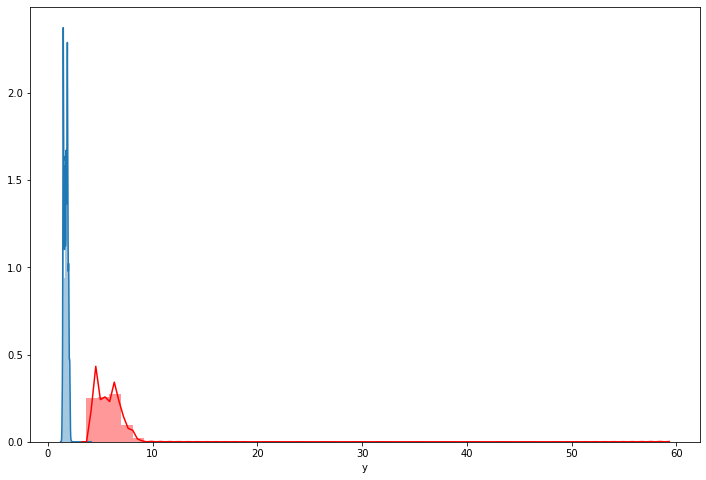

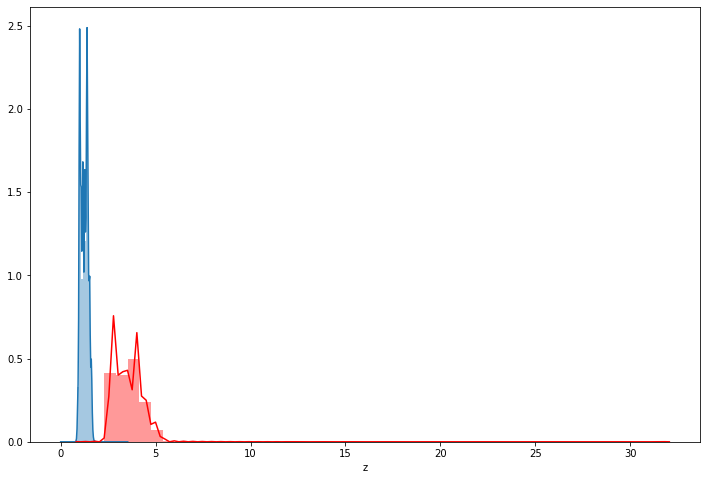

In [78]:
for column in ['carat','depth','table','x','y','z']:
    plt.figure(figsize = (12,8))
    sns.distplot(np.log(first_model[column]))
    sns.distplot(first_model[column], color = 'red');

In [80]:
for column in ['carat','depth','table','x','y','z']:
    print(stats.shapiro(np.log(first_model[column])))

(0.9588618278503418, 0.0)
(0.9523649215698242, 0.0)
(0.9629195332527161, 0.0)
(0.9632109999656677, 0.0)
(0.9611150622367859, 0.0)
(0.9617867469787598, 0.0)


C:\Users\55119\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [81]:
second_model = first_model.copy()

Checking the linear model regression to have and idea of the relationship of the dependent variable price with the numerical variables.

<Figure size 864x576 with 0 Axes>

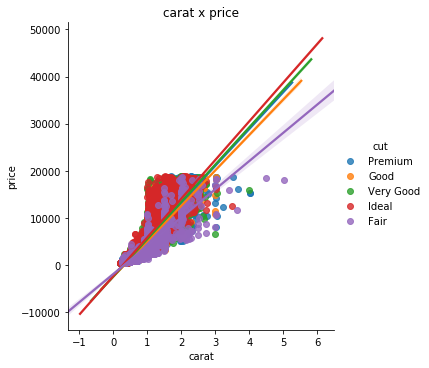

<Figure size 864x576 with 0 Axes>

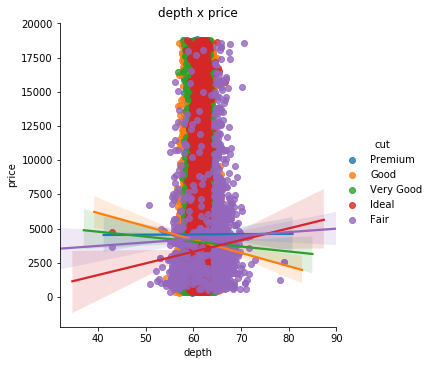

<Figure size 864x576 with 0 Axes>

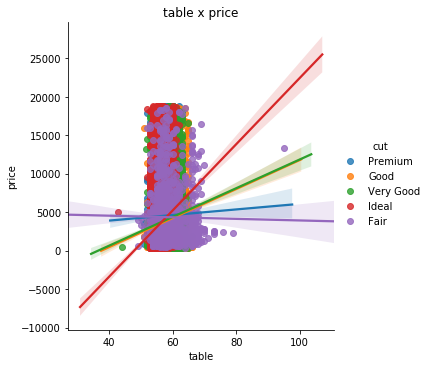

<Figure size 864x576 with 0 Axes>

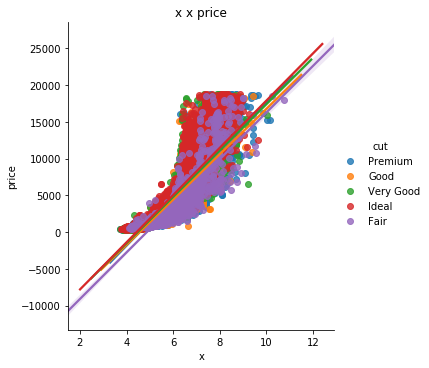

<Figure size 864x576 with 0 Axes>

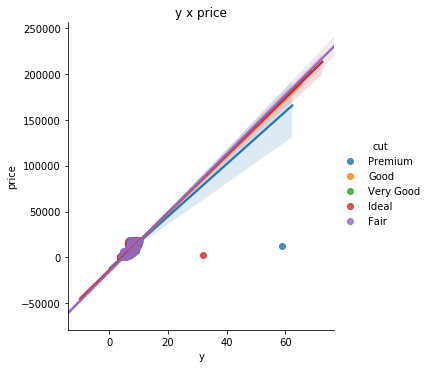

<Figure size 864x576 with 0 Axes>

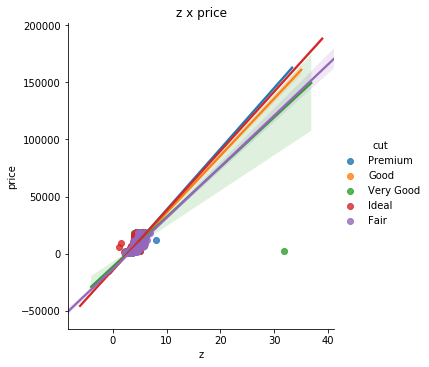

In [194]:
for column in ['carat','depth','table','x','y','z']:
    plt.figure(figsize = (12,8))
    sns.lmplot(x = column, y = 'price', data = diamonds, hue = 'cut')
    plt.title(column + ' x price');

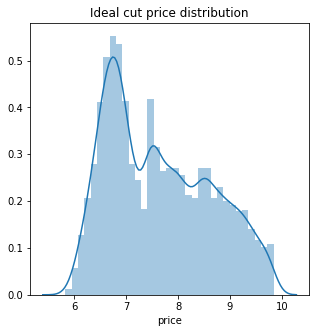

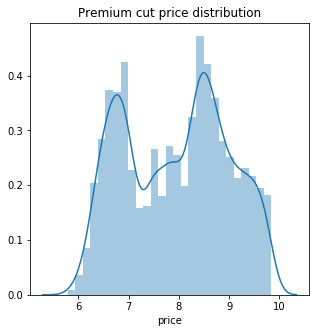

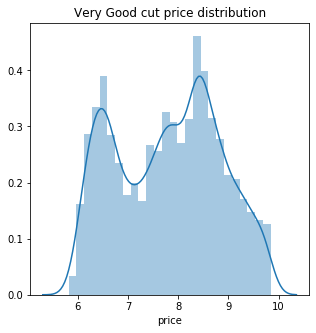

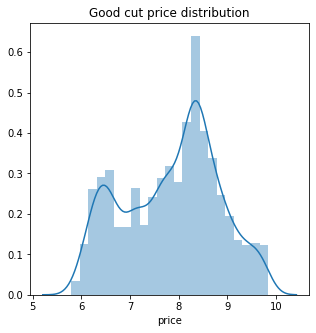

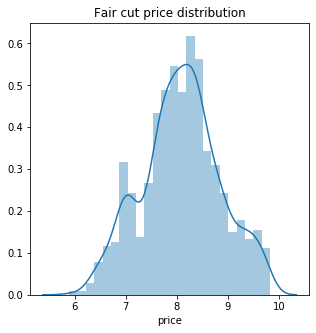

In [137]:

for index in diamonds.cut.value_counts().index:
    plt.figure(figsize=(5,5))
    sns.distplot(np.log(diamonds.loc[diamonds.cut == index,'price']))
    plt.title(index + ' cut price distribution');
   

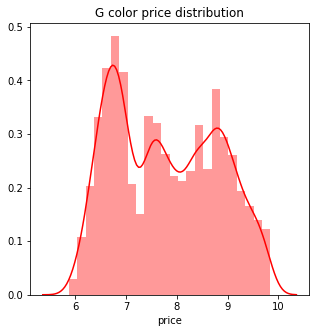

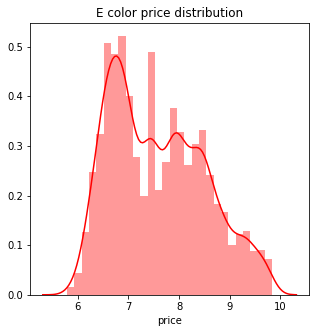

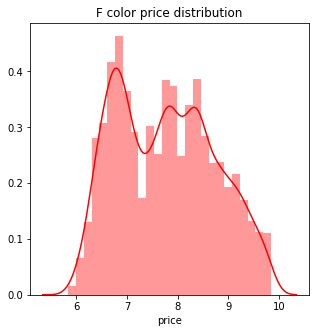

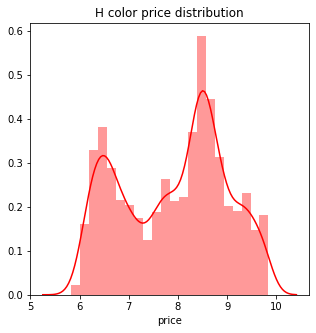

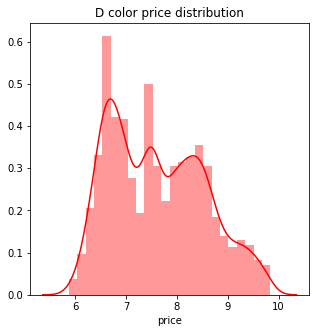

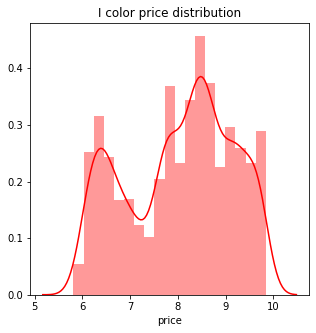

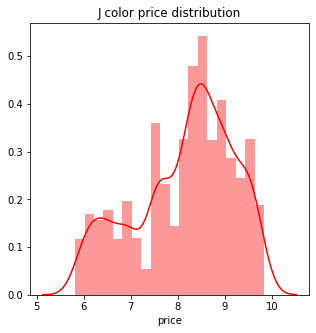

In [136]:
for index in diamonds.color.value_counts().index:
    plt.figure(figsize = (5,5))
    sns.distplot(np.log(diamonds.loc[diamonds.color == index,'price']), color = 'red')
    plt.title(index + ' color price distribution')

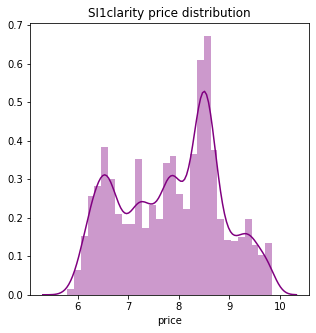

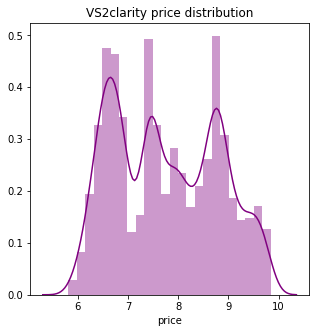

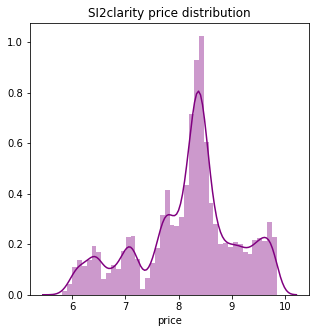

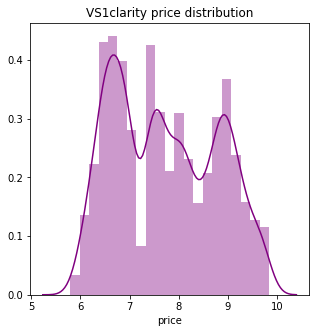

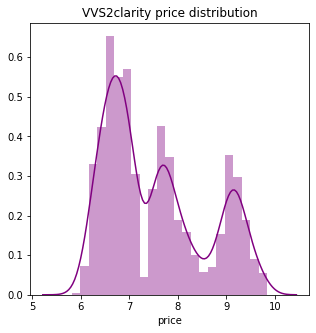

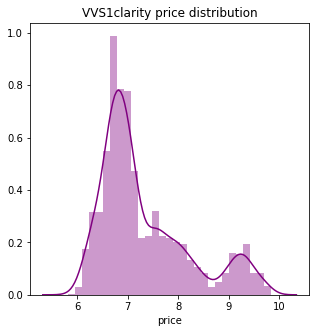

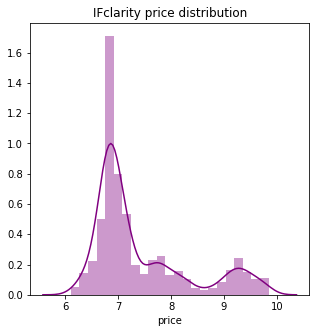

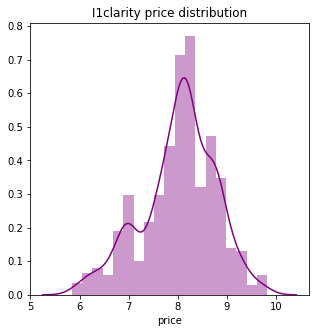

In [135]:
for index in diamonds.clarity.value_counts().index:
    plt.figure(figsize = (5,5))
    sns.distplot(np.log(diamonds.loc[diamonds.clarity == index,'price']), color = 'purple')
    plt.title(index + 'clarity price distribution');
    

According to the price distribution separated by each of the three(color, clarity and cut) categorical variables we can observe that a log trasnformed price return more gaussian-like distribution. Let's apply try to log transform the dependent varable and all of the features.

In [183]:
model = LinearRegression()
X = first_model
y = np.log(diamonds['price'])
model.fit(X,y)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))

array([5.70716859, 5.96570586, 6.01964251, ..., 7.88904863, 7.93226897,
       7.89875015])

In [184]:
rmse = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))

In [185]:
rmse

872.6549059533884

In [186]:
model.score(X,y)

0.9815236282479397

In [187]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick = pd.concat([rick_diamonds[['carat', 'depth', 'table', 'x', 'y','z']],
                  rick_dummies], axis = 1)

In [191]:
rick_diamonds['price_predicted'] = np.exp(model.predict(rick))

In [192]:
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2753.410041
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,857.529006
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1443.771615
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7076.761314
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18291.035786


In [193]:
rick_diamonds.to_csv('second_model.csv')

Saving the prediction of rick diamonds prices with the second model. The difference with the first is the log transforming of the price.

In [106]:
diamonds.corr()["price"].sort_values(ascending = False)

price    1.000000
carat    0.922176
x        0.887895
z        0.867529
y        0.866545
table    0.127936
depth   -0.012135
Name: price, dtype: float64

In [107]:
diamonds.corr()["carat"].sort_values(ascending = False)

carat    1.000000
x        0.977868
z        0.959690
y        0.951946
price    0.922176
table    0.181719
depth    0.027092
Name: carat, dtype: float64

In [108]:
diamonds.corr()["x"].sort_values(ascending = False)

x        1.000000
carat    0.977868
z        0.974121
y        0.972691
price    0.887895
table    0.196034
depth   -0.025740
Name: x, dtype: float64

In [109]:
diamonds.corr()["y"].sort_values(ascending = False)

y        1.000000
x        0.972691
z        0.953638
carat    0.951946
price    0.866545
table    0.184010
depth   -0.029781
Name: y, dtype: float64

In [110]:
diamonds.corr()["z"].sort_values(ascending = False)

z        1.000000
x        0.974121
carat    0.959690
y        0.953638
price    0.867529
table    0.152091
depth    0.094321
Name: z, dtype: float64

The variables 'carat', 'x', 'y' and 'z' seems to be strongly related, let's try to remove some of them to run the model.

In [195]:
first_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

First model removing 'x', 'y' and 'z'.

In [204]:
model = LinearRegression()
X = first_model[['carat', 'y', 'z','depth', 'table','cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = np.log(diamonds['price'])
model.fit(X,y)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))

In [201]:
rmse #model without z

876.0681483916583

In [203]:
rmse #model without y

870.3846318133484

In [205]:
rmse #model without x

308929199544.7961

Let's try running models divided by the different values of categorical variables.

In [230]:
def model_by_cut(df):
    cuts = df.cut.unique()
    models = []
    r_squared = []
    errors = []
    for cut in cuts:
        data = df.loc[df['cut']==cut,:]
        model = LinearRegression()
        X = data[['x','y','z','carat','depth','table','color_D', 'color_E', 'color_F','color_G', 'color_H',
                       'color_I','color_J','clarity_I1', 'clarity_IF', 'clarity_SI1','clarity_SI2', 'clarity_VS1',
                       'clarity_VS2','clarity_VVS1','clarity_VVS2']]
        y = np.log(data['price'])
        model.fit(X,y)
        y_pred = model.predict(X)
        r2 = model.score(X,y)
        error = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))
        r_squared.append(r2)
        errors.append(error)
        models.append(f'{cut} cut diamonds price model: R2 = {r2}, Error = {error}')
    models.append(f'Mean R2 = {np.mean(r_squared)}, Mean Error = {np.mean(errors)}')   
    return models

In [264]:
third_model = pd.concat([diamonds,categories_dummies], axis = 1)

In [233]:
model_by_cut(third_model)

['Premium cut diamonds price model: R2 = 0.9839316538319602, Error = 924.9624313579283',
 'Good cut diamonds price model: R2 = 0.9824965780434581, Error = 759.5610030597253',
 'Very Good cut diamonds price model: R2 = 0.986377941509065, Error = 741.0144343187701',
 'Ideal cut diamonds price model: R2 = 0.9830101260524086, Error = 735.1572701974613',
 'Fair cut diamonds price model: R2 = 0.9418382419766618, Error = 1114.61983075024',
 'Mean R2 = 0.9755309082827107, Mean Error = 855.0629939368249']

In [238]:
def model_by_color(df):
    colors = df.color.unique()
    models = []
    r_squared = []
    errors = []
    for color in colors:
        data = df.loc[df['color']==color,:]
        model = LinearRegression()
        X = data[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good','clarity_IF', 'clarity_SI1','clarity_SI2', 'clarity_VS1', 'clarity_VS2',
              'clarity_VVS1','clarity_VVS2']]
        y = np.log(data['price'])
        model.fit(X,y)
        y_pred = model.predict(X)
        r2 = model.score(X,y)
        error = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))
        r_squared.append(r2)
        errors.append(error)
        models.append(f'{color} color diamonds price model: R2 = {r2}, Error = {error}')
    models.append(f'Mean R2 = {np.mean(r_squared)}, Mean Error = {np.mean(errors)}')   
    return models

In [239]:
model_by_color(third_model)

['E color diamonds price model: R2 = 0.9785788467326957, Error = 736.3389424219829',
 'I color diamonds price model: R2 = 0.9885575129255578, Error = 824.441767084796',
 'J color diamonds price model: R2 = 0.9873362482461685, Error = 724.6997889351956',
 'H color diamonds price model: R2 = 0.9856495481696889, Error = 847.4637477861289',
 'F color diamonds price model: R2 = 0.9822612285048511, Error = 696.3928919670316',
 'G color diamonds price model: R2 = 0.9855977118389382, Error = 711.5992970263723',
 'D color diamonds price model: R2 = 0.9784160670645771, Error = 695.9997802334494',
 'Mean R2 = 0.9837710233546396, Mean Error = 748.1337450649937']

In [246]:
def model_by_clarity(df):
    clarities = df.clarity.unique()
    models = []
    r_squared = []
    errors = []
    for clarity in clarities:
        data = df.loc[df['clarity']==clarity,:]
        model = LinearRegression()
        X = data[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good', 'color_D', 'color_E', 'color_F','color_G', 'color_H','color_I', 'color_J']]
        y = np.log(data['price'])
        model.fit(X,y)
        y_pred = model.predict(X)
        r2 = model.score(X,y)
        error = np.sqrt(mean_squared_error(np.exp(y),np.exp(y_pred)))
        r_squared.append(r2)
        errors.append(error)
        models.append(f'{clarity} clarity diamonds price model: R2 = {r2}, Error = {error}')
    models.append(f'Mean R2 = {np.mean(r_squared)}, Mean Error = {np.mean(errors)}')
    return models

In [247]:
model_by_clarity(third_model)

['SI1 clarity diamonds price model: R2 = 0.9847557640796357, Error = 684.2243775363737',
 'VS1 clarity diamonds price model: R2 = 0.9862094478127668, Error = 730.1150768768375',
 'VS2 clarity diamonds price model: R2 = 0.985440735246153, Error = 696.317280659343',
 'SI2 clarity diamonds price model: R2 = 0.9783051895764642, Error = 1155.3944293757854',
 'VVS2 clarity diamonds price model: R2 = 0.9826352832527887, Error = 705.6448120110474',
 'VVS1 clarity diamonds price model: R2 = 0.9798346558416355, Error = 646.0218580911156',
 'I1 clarity diamonds price model: R2 = 0.9517613408746225, Error = 760.2865821820718',
 'IF clarity diamonds price model: R2 = 0.9849254720821333, Error = 723.0375880808637',
 'Mean R2 = 0.979233486095775, Mean Error = 762.6302506016798']

In [253]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick = pd.concat([rick_diamonds,
                  rick_dummies], axis = 1)

In [283]:
def model_clarity(df,df1):
    clarities = df.clarity.unique()
    models = []
    for clarity in clarities:
        dt = df.loc[df['clarity']==clarity,:]
        model = LinearRegression()
        X = dt[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good', 'color_D', 'color_E', 'color_F','color_G', 'color_H','color_I', 'color_J']]
        y = np.log(dt['price'])
        model.fit(X,y)
        d = df1.loc[df1['clarity']==clarity,:]
        X1 = d[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good', 'color_D', 'color_E', 'color_F','color_G', 'color_H','color_I', 'color_J']]
        d['price_predicted'] = np.exp(model.predict(X1))
        models.append(d[['carat','cut','color','clarity','depth','table','x','y','z','price_predicted']])
    data = pd.concat(models).sort_index()
    return data

In [265]:
third_model.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [266]:
rick.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [284]:
t_model = model_clarity(third_model,rick)

C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [285]:
t_model.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3027.135252
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,895.402571
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1376.020982
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7291.339972
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16294.013641


In [286]:
t_model.to_csv('third_model_by_clarity.csv')

In [287]:
def model_color(df,df1):
    colors = df.color.unique()
    models = []
    for color in colors:
        dt = df.loc[df['color']==color,:]
        model = LinearRegression()
        X = dt[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good','clarity_IF', 'clarity_SI1','clarity_SI2', 'clarity_VS1', 'clarity_VS2',
                'clarity_VVS1','clarity_VVS2']]
        y = np.log(dt['price'])
        model.fit(X,y)
        d = df1.loc[df1['color']==color,:]
        X1 = d[['x','y','z','carat','depth','table','cut_Fair', 'cut_Good','cut_Ideal', 'cut_Premium',
              'cut_Very Good','clarity_IF', 'clarity_SI1','clarity_SI2', 'clarity_VS1', 'clarity_VS2',
              'clarity_VVS1','clarity_VVS2']]
        d['price_predicted'] = np.exp(model.predict(X1))
        models.append(d[['carat','cut','color','clarity','depth','table','x','y','z','price_predicted']])
    data = pd.concat(models).sort_index()
    return data

In [288]:
fourth_model.head(5)

,carat,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,H,SI2,63.4,57.0,6.10,6.18,3.89,2990.727080
1,0.38,F,VS2,60.3,61.0,4.68,4.71,2.83,862.353185
2,0.52,H,VS2,61.8,56.0,5.19,5.16,3.20,1412.280101
3,1.10,G,VS1,61.3,56.0,6.65,6.69,4.09,7354.074679
4,2.28,G,SI2,61.6,57.0,8.44,8.37,5.18,17425.486923


In [289]:
fourth_model = model_color(third_model,rick)

C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [290]:
fourth_model.to_csv('fourth_model_by_color.csv')